In [1]:
### Week 6-2: Support Vector Machine : Coding example

import numpy as np

## Using iris dataset from python package
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

# Construct variables
X = iris.data[:,:2]
y = iris.target

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Split the data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.33,random_state=5)

/Users/chpyo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
# Build the SVM model using a linear kernel
from sklearn.svm import SVC
svm = SVC(kernel="linear", random_state=0, C=1)
model = svm.fit(X_train, y_train)

## Make prediction and evaluate the performance
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.82

In [3]:
## Using simulated dataset for non-linearly separable case
np.random.seed(0) # Set randomization seed
X = np.random.randn(200, 2) # Generate two features
y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y_xor, 0, 1) # Creating linearly non-separable case

# Build the SVM with a linear kernel
svm_linear = SVC(kernel="linear", random_state=0, C=1)
linear = svm_linear.fit(X, y)

# Build the SVM with a RBF kernel
svm_rbf = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
rbf = svm_rbf.fit(X, y)

In [4]:
# Plot observations and hyperplane
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


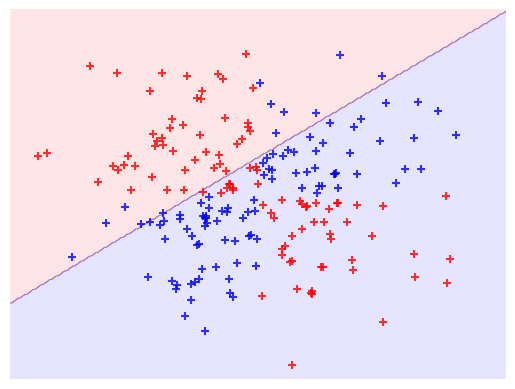

In [5]:
plot_decision_regions(X, y, classifier=svm_linear)
plt.axis("off"), plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


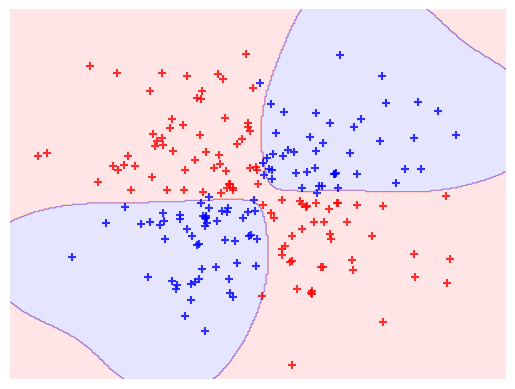

In [6]:
plot_decision_regions(X, y, classifier=svm_rbf)
plt.axis("off"), plt.show();